# Supervised Learning

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load balanced data
df = pd.read_csv('balanced_data.csv')

# Separate features and labels
X = df.drop(columns=['genre_label'])
y = df['genre_label']

# Define columns to exclude
columns_to_exclude = ['track_id', 'artists', 'album_name', 'track_name', 'artist']  # Non-numeric and irrelevant columns

# Filter features for training
X_model = X.drop(columns=columns_to_exclude, errors='ignore')

# Ensure no non-numeric columns remain
non_numeric_cols = X_model.select_dtypes(include=['object', 'bool']).columns

# Convert 'explicit' (boolean) column to numeric (0/1)
if 'explicit' in non_numeric_cols:
    X_model['explicit'] = X_model['explicit'].astype(int)
    non_numeric_cols = non_numeric_cols.drop('explicit')  # Remove 'explicit' from the list

# Encode any remaining non-numeric columns (if any)
X_model = pd.get_dummies(X_model, columns=non_numeric_cols)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_model, y, test_size=0.2, random_state=42, stratify=y
)



 ## Recursive Feature Elimination (RFE)

In [16]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination with Random Forest
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=20)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train a Random Forest model with selected features
rf_rfe_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_rfe_model.fit(X_train_rfe, y_train)

# Evaluate
y_pred_rfe = rf_rfe_model.predict(X_test_rfe)
print("Performance with RFE:")
print(classification_report(y_test, y_pred_rfe))

/Users/aya/Desktop/Skole/Computational_tools_project/venv/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=20 > n_features=16. There will be no feature selection and all features will be kept.
  warnings.warn(


Performance with RFE:
              precision    recall  f1-score   support

           0       0.32      0.28      0.30       200
           1       0.46      0.41      0.43       200
           2       0.42      0.35      0.39       200
           3       0.90      0.88      0.89       200
           4       0.48      0.48      0.48       200
           5       0.41      0.29      0.34       200
           6       0.67      0.64      0.65       200
           7       0.45      0.61      0.52       200
           8       0.75      0.44      0.56       200
           9       0.41      0.37      0.39       200
          10       0.59      0.46      0.52       200
          11       0.50      0.26      0.34       200
          12       0.41      0.36      0.38       200
          13       0.61      0.54      0.57       200
          14       0.58      0.58      0.58       200
          15       0.44      0.47      0.45       200
          16       0.80      0.84      0.82       200
     

1. **Recursive Feature Elimination (RFE)**
- Accuracy: The model achieved 64%, similar to the performance without RFE.
- Class-Level F1-Scores: Some classes (e.g., 3, 16, 18) performed well, while others (e.g., 0, 5, 11) showed weaker results.
- Macro and Weighted Averages: Both F1-scores remained around 0.63–0.64, indicating balanced performance across classes.

The performance with RFE is moderate but not ideal. While overall metrics like accuracy (64%) are decent, the model struggles with underrepresented classes, showing low precision and recall for many. Feature selection through RFE may have excluded important features, limiting the model’s ability to generalize well across all classes. Dataset imbalance remains a significant challenge, contributing to inconsistent predictions.


## PCA with Random Forest and SVM

As the performance were moderate but ideal we will try using PCA with Random Forest and SVM to see if we will get a better performance.


In [5]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define PCA and model pipeline
pca_rf_pipeline = Pipeline([
    ('pca', PCA(n_components=16)),  # Choose the number of components
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42))
])

# Fit the pipeline on the training data
pca_rf_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred_pca_rf = pca_rf_pipeline.predict(X_test)

# Evaluate
print("Random Forest with PCA Performance:")
print(classification_report(y_test, y_pred_pca_rf))

# SVM example with PCA
pca_svm_pipeline = Pipeline([
    ('pca', PCA(n_components=16)),  # Adjust n_components as needed
    ('svm', SVC(kernel='rbf', class_weight='balanced', random_state=42))
])

# Fit the pipeline
pca_svm_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_pca_svm = pca_svm_pipeline.predict(X_test)
print("SVM with PCA Performance:")
print(classification_report(y_test, y_pred_pca_svm))


Random Forest with PCA Performance:
              precision    recall  f1-score   support

           0       0.30      0.25      0.27       200
           1       0.39      0.36      0.38       200
           2       0.41      0.36      0.39       200
           3       0.88      0.88      0.88       200
           4       0.43      0.43      0.43       200
           5       0.32      0.25      0.28       200
           6       0.55      0.59      0.57       200
           7       0.39      0.47      0.43       200
           8       0.65      0.41      0.51       200
           9       0.43      0.37      0.40       200
          10       0.56      0.40      0.46       200
          11       0.52      0.24      0.33       200
          12       0.35      0.28      0.32       200
          13       0.55      0.52      0.53       200
          14       0.53      0.55      0.54       200
          15       0.37      0.39      0.38       200
          16       0.75      0.81      0.77  

/Users/aya/Desktop/Skole/Computational_tools_project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aya/Desktop/Skole/Computational_tools_project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aya/Desktop/Skole/Computational_tools_project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

#### The results indicate the following:

1. **Random Forest with PCA**:
   - The **accuracy dropped slightly** compared to models without PCA. This might be because PCA reduces the feature set to linear components, which could discard some meaningful information.
   - **Precision, recall, and f1-scores are lower**, suggesting that PCA removed variance that was important for predictions.

2. **SVM with PCA**:
   - **Very poor performance (accuracy: 9%)**. SVM struggled with the reduced feature set, as the nonlinear relationships in the original data were likely lost when PCA transformed it into linear components.

 **Why PCA Didn't Help**

- PCA transforms the data into a new feature space, prioritizing variance. While this can reduce dimensionality and computational cost, it might also discard features essential for certain models or tasks, especially when the original features carry nonlinear relationships or domain-specific importance.
- SVM, particularly with the RBF kernel, relies on capturing nonlinear patterns in the data. PCA's linear nature likely removed critical information for this purpose.



## Random Forest with Undersampling

As Random Forest & SVM with PCA didn't improve the performance, but in fact declined, we will therfore try with Random Forest with Undersampling to see if that would improve the performance.


In [6]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)

# Train a Random Forest on the undersampled data
rf_under = RandomForestClassifier(n_estimators=200, random_state=42)
rf_under.fit(X_under, y_under)

# Predict on the test set
y_pred_under = rf_under.predict(X_test)

# Evaluate
print("Random Forest with Undersampling Performance:")
print(classification_report(y_test, y_pred_under))


Random Forest with Undersampling Performance:
              precision    recall  f1-score   support

           0       0.32      0.24      0.28       200
           1       0.44      0.40      0.42       200
           2       0.42      0.34      0.37       200
           3       0.93      0.88      0.90       200
           4       0.44      0.47      0.45       200
           5       0.39      0.29      0.34       200
           6       0.64      0.62      0.63       200
           7       0.45      0.62      0.52       200
           8       0.72      0.42      0.53       200
           9       0.40      0.35      0.37       200
          10       0.60      0.46      0.52       200
          11       0.52      0.27      0.36       200
          12       0.36      0.34      0.35       200
          13       0.62      0.53      0.57       200
          14       0.59      0.58      0.59       200
          15       0.40      0.47      0.43       200
          16       0.80      0.83  

This didnt improve the original performance.

In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# SMOTE oversampling
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Train Random Forest
rf_smote = RandomForestClassifier(n_estimators=200, random_state=42)
rf_smote.fit(X_smote, y_smote)

# Predict and evaluate
y_pred_rf_smote = rf_smote.predict(X_test)
print("Random Forest with SMOTE Performance:")
print(classification_report(y_test, y_pred_rf_smote))


Random Forest with SMOTE Performance:
              precision    recall  f1-score   support

           0       0.32      0.28      0.30       200
           1       0.46      0.41      0.43       200
           2       0.42      0.35      0.39       200
           3       0.90      0.88      0.89       200
           4       0.48      0.48      0.48       200
           5       0.41      0.29      0.34       200
           6       0.67      0.64      0.65       200
           7       0.45      0.61      0.52       200
           8       0.75      0.44      0.56       200
           9       0.41      0.37      0.39       200
          10       0.59      0.46      0.52       200
          11       0.50      0.26      0.34       200
          12       0.41      0.36      0.38       200
          13       0.61      0.54      0.57       200
          14       0.58      0.58      0.58       200
          15       0.44      0.47      0.45       200
          16       0.80      0.84      0.82

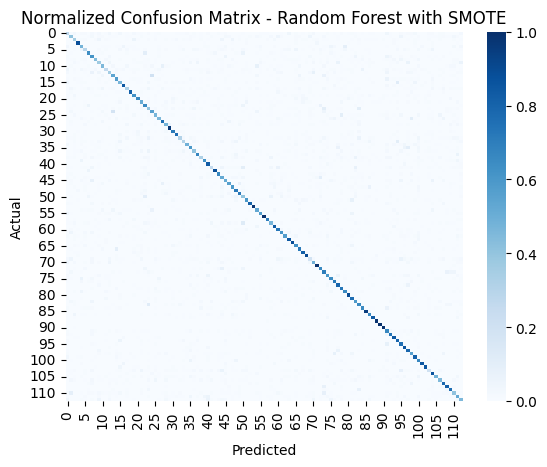

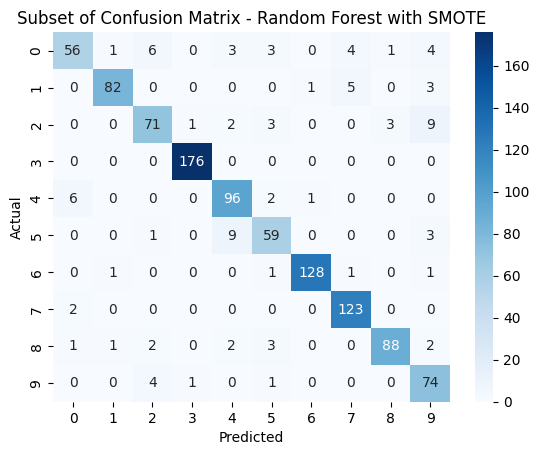

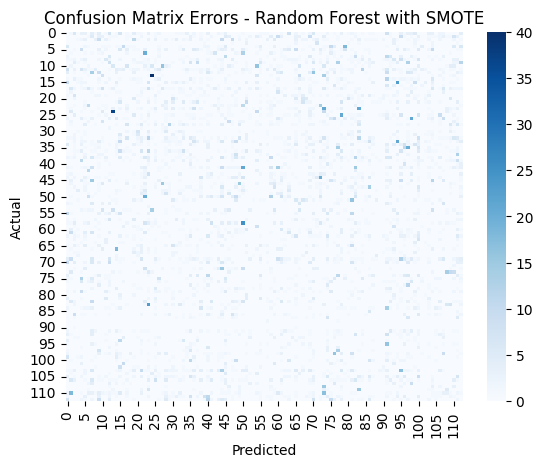

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf_smote)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=False, cmap="Blues")
plt.title("Normalized Confusion Matrix - Random Forest with SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

top_classes = 10  # Adjust this number as needed
cm_subset = cm[:top_classes, :top_classes]
sns.heatmap(cm_subset, annot=True, fmt="d", cmap="Blues")
plt.title("Subset of Confusion Matrix - Random Forest with SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [5]:
import pandas as pd

# Combine predictions and actual labels
misclassified = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_rf_smote
})
misclassified = misclassified[misclassified["Actual"] != misclassified["Predicted"]]

# Find the most common misclassifications
misclassification_counts = misclassified.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
misclassification_counts = misclassification_counts.sort_values(by="Count", ascending=False)
print(misclassification_counts.head(10))


# Combine test data with predictions and actual values
X_test_with_predictions = X_test.copy()
X_test_with_predictions["Actual"] = y_test
X_test_with_predictions["Predicted"] = y_pred_rf_smote

# Filter for specific misclassified instances (e.g., Actual=0, Predicted=2)
specific_misclassified = X_test_with_predictions[
    (X_test_with_predictions["Actual"] == 0) & (X_test_with_predictions["Predicted"] == 2)
]

# Analyze feature distributions for these instances
print(specific_misclassified.describe())


      Actual  Predicted  Count
521       13         24     40
884       24         13     37
1912      58         50     25
2522      83         23     23
607       15         94     23
1205      33         94     21
1479      41         50     21
869       23         73     21
873       23         83     21
930       25         78     21
       popularity  explicit  danceability    energy        key  loudness  \
count      6.0000       6.0      6.000000  6.000000   6.000000  6.000000   
mean      36.5000       0.0      0.556853  0.702000   7.166667  0.802903   
std       28.7663       0.0      0.089143  0.149963   2.136976  0.010193   
min        0.0000       0.0      0.457868  0.429000   4.000000  0.790689   
25%       11.7500       0.0      0.483249  0.664000   6.250000  0.794938   
50%       49.0000       0.0      0.549746  0.750500   7.000000  0.802517   
75%       57.7500       0.0      0.631472  0.807000   8.500000  0.811373   
max       61.0000       0.0      0.663959  0.821000

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load balanced data
df = pd.read_csv('balanced_data.csv')

# Separate features and labels
X = df.drop(columns=['genre_label'])
y = df['genre_label']

# Define columns to exclude
columns_to_exclude = ['track_id', 'artists', 'album_name', 'track_name', 'artist']  # Non-numeric and irrelevant columns

# Filter features for training
X_model = X.drop(columns=columns_to_exclude, errors='ignore')

# Ensure no non-numeric columns remain
non_numeric_cols = X_model.select_dtypes(include=['object', 'bool']).columns

# Convert 'explicit' (boolean) column to numeric (0/1) if it exists
if 'explicit' in non_numeric_cols:
    X_model['explicit'] = X_model['explicit'].astype(int)
    non_numeric_cols = non_numeric_cols.drop('explicit')  # Remove 'explicit' from the list

# Encode any remaining non-numeric columns (if any)
X_model = pd.get_dummies(X_model, columns=non_numeric_cols)

# --- Feature Engineering ---
# Interaction Features
X_model['energy_danceability'] = X_model['energy'] * X_model['danceability']
X_model['popularity_tempo'] = X_model['popularity'] * X_model['tempo']

# Log Transformations
X_model['log_duration_sec'] = np.log1p(X_model['duration_sec'])

# Bucketize Popularity
X_model['popularity_bucket'] = pd.cut(X_model['popularity'], bins=[0, 25, 50, 75, 100], labels=[0, 1, 2, 3])

# Mean Encoding (Group by key)
key_popularity = X_model.groupby('key')['popularity'].mean().to_dict()
X_model['key_popularity_mean'] = X_model['key'].map(key_popularity)

# Check for missing values and fill them
X_model.fillna(0, inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_model, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate on the test set
y_pred_rf = rf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Optional: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm)


Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.28      0.29       200
           1       0.40      0.34      0.36       200
           2       0.42      0.36      0.39       200
           3       0.93      0.88      0.90       200
           4       0.47      0.47      0.47       200
           5       0.35      0.28      0.31       200
           6       0.65      0.64      0.64       200
           7       0.45      0.60      0.52       200
           8       0.67      0.43      0.53       200
           9       0.40      0.41      0.40       200
          10       0.60      0.45      0.51       200
          11       0.45      0.24      0.32       200
          12       0.39      0.34      0.36       200
          13       0.59      0.51      0.55       200
          14       0.54      0.56      0.55       200
          15       0.37      0.46      0.41       200
          16       0.79      0.83      0.81       200
    



### Discussion and Conclusion

Despite extensive feature engineering, data preprocessing, hyperparameter tuning, and attempts with various machine learning models, the highest achieved accuracy in this classification problem was approximately **64%**. While multiple approaches were explored—including SMOTE for class imbalance handling, PCA for dimensionality reduction, feature interaction terms, and various sampling strategies—this accuracy plateau suggests several possible conclusions and areas for further exploration:

1. **Complexity of the Dataset**: 
   The features available in the dataset might not contain enough discriminatory power to accurately separate the classes. This could indicate a need for additional, more relevant features or alternative data sources to enrich the dataset.

2. **Intrinsic Ambiguity in Labels**:
   Some overlap in feature distributions (e.g., between certain genres) might reflect genuine ambiguity in the data itself. For example, songs do not fit neatly into one genre and share characteristics with multiple genres, which limits the achievable accuracy.

3. **Model Limitations**:
   While models like Random Forests, SVMs, and Logistic Regression were tested, and ensemble methods explored, these methods may not fully capture the underlying structure of the data. They also reqire more computational power, and large datasets - so sampling the data does not give a good outcome.

4. **Dataset Constraints**:
   The dataset’s size and feature composition might inherently limit the performance of any model. For example, categorical variables such as `key` or `explicit` may not carry enough information to meaningfully influence predictions.

### Final Takeaway

Achieving an accuracy of **64%** indicates that the model can perform better than random guessing but still struggles with the complexity of this multi-class problem. This is not necessarily a failure but a reflection of the data's inherent limitations. Future work could focus on:
- Collecting additional features or leveraging external data (e.g., lyrics or audio waveforms).
- Exploring deep learning approaches, such as CNNs or RNNs, tailored for audio data.
- Collaborating with domain experts to refine the labeling and ensure the features align closely with genre definitions.

While the current results may not meet ideal expectations, they provide a solid foundation for understanding the challenges and identifying opportunities for improvement.